In [ ]:
#system("source activate sf_test")

In [ ]:
#install.packages('ggplot2')
#install.packages("dplyr")

In [2]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
#find the .BED files of Roadmap enhancers intersected with hg19 files containing species counts
path <- "/dors/capra_lab/users/fongsl/broadly_active_enhancers/data/roadmap_multi_data/hg38/human_specific"
setwd(path)

In [4]:
a <- list.files(pattern="\\chr*")

In [ ]:
print(a)

In [5]:
bedfile = a[1]
print(bedfile)
df <-read.table(bedfile, sep = '\t', h=F, stringsAsFactors=F, nrows=20000)
dim(df)
head(df)

[1] "chr1_hspec_x_hg38.bed"


[1] 20000    14

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
chr1,9988,10018,1,0.10,.,-1,-1,.,.,.,.,.,0
chr1,10018,10100,2,0.26,.,-1,-1,.,.,.,.,.,0
chr1,10100,10214,3,0.39,.,-1,-1,.,.,.,.,.,0
chr1,10214,10471,4,0.48,.,-1,-1,.,.,.,.,.,0
chr1,10471,10516,3,0.39,.,-1,-1,.,.,.,.,.,0
chr1,10516,10542,2,0.26,.,-1,-1,.,.,.,.,.,0


In [ ]:
#hq_species =['Mmul', 'Cjac', 'Mmus', 'Rnor', 'Ocun', 'Btau', 'Sscr', 'Cfam', 'Fcat'] #rhesus, marmoset, mouse, rat, rabbit, cow
hq_species = c('hg38', 'rheMac3', 'calJac3', 'mm10', 'rn6', 'oryCun2', 'bosTau8', 'canFam3', 'felCat8', 'susScr3')

In [6]:
# format the table

# rename columns
names(df) = c("enh_chr", "enh_start", "enh_end", "enh_overlap","enh_percentile", "hg138_chr", "hg38_start", "hg38_end", "hg38_strand", "hg38_ref", "hg38_100spec", "hg38_9vspec", "hg38_100spec_names", "length")

# convert species count columns from characters to integers 
df$hg38_100spec <- as.integer(df$hg38_100spec)
df$hg38_9vspec <- as.integer(df$hg38_9vspec)
#df$new= sum((hq_species %in% df$hg38_100spec_names), na.rm=TRUE)

# calculate the length of fragment overlap in log10
df$log10_length = log(df$length, 10)

# create a subset of the dataframe to remove non-overlapping roadmap fragments in hg19 MSA
df2 = subset(df, df$length >0)

#make a subset of the counts
df_count <-plyr::count(df2, vars = c( "hg38_100spec","enh_overlap"))

#head(df2, nrows =1)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [15]:
typeof(df2$hg38_100spec)

[1] "integer"

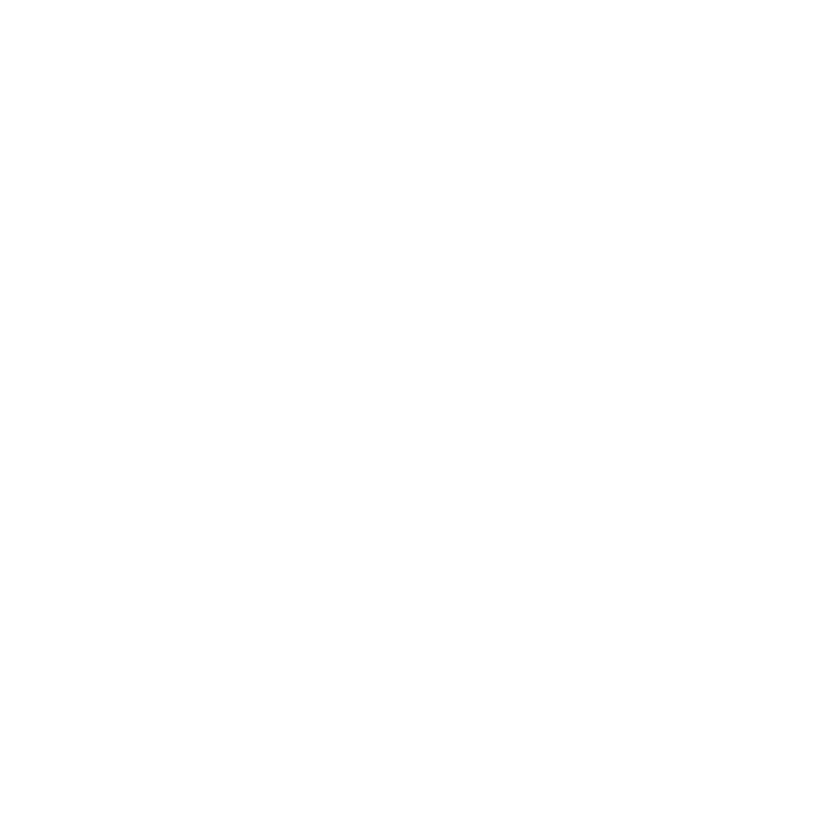

In [20]:
ggplot(data=df2, aes(enh_overlap, color= hg38_100spec, group =hg38_100spec ))+ geom_boxplot()
#scale_color_gradientn(colours = rainbow(4))+
#ggtitle("TEST - chr1 species conservation x sample overlap") + xlab("hg38 start")

In [ ]:
a <- df2[1,-1]

In [ ]:
a$new= sum(hq_species %in% a$hg38_100spec_names, na.rm=TRUE)

In [ ]:
for (species in hq_species){
    val = 0
    a= grep(species,as.factor(a$hg38_100spec_names))
    print(a)

}

In [ ]:
matches <- (grep(paste(hq_species,collapse="|"), 
                        unlist(a$hg38_100spec_names), value=TRUE))
print(matches)

In [ ]:
# how many Roadmap enhancers do not overlap any sequencing block in Multiz46-way?

noverlap = subset(df, df$length==0)
length(noverlap)

hspecific = subset(df2, df2$hg38_100spec ==0)
few=subset(df2, hg38_100spec<5)

In [ ]:
ggplot(data=few, aes(x= hg38_start, y = enh_overlap,width = length, color= hg38_100spec))+ 
geom_tile()+
scale_color_gradientn(colours = rainbow(4))+
ggtitle("TEST - chr1 species conservation x sample overlap") + xlab("hg38 start")

In [ ]:
ggplot(data=few, aes(y = enh_overlap, x = hg38_start, color=hg38_100spec))+ 
geom_line(size =1)+
scale_color_gradientn(colours = rainbow(4))+
scale_x_continuous()

In [ ]:
ggplot(data=few, aes(x = hg38_start, y = enh_overlap, xend = hg38_end, yend = enh_overlap, color = hg38_100spec))+ 
geom_segment(size = 1)+

geom_point(size =0.25)+
scale_color_gradientn(colours = rainbow(4))


In [ ]:
df_count <-plyr::count(df2, vars = c( "hg38_100spec","enh_overlap"))
head(df_count)

In [ ]:
graph_stuff <-function(bedfile){
    # make dataframe of the bedfile
    df <-read.table(bedfile, sep = '\t', h=F, stringsAsFactors=F)
    
    chr= unlist(strsplit(bedfile, "_"))[1]
    print(chr)
    ## format the table

    names(df) = c("enh_chr", "enh_start", "enh_end", "enh_overlap","enh_percentile", "hg138_chr", "hg38_start", "hg38_end", "hg38_strand", "hg38_ref", "hg38_100spec", "hg38_9vspec", "hg38-100spec_names", "length")

    # convert species count columns from characters to integers 
    df$hg38_100spec <- as.integer(df$hg38_100spec)
    df$hg38_9vspec <- as.integer(df$hg38_9vspec)

    # calculate the length of fragment overlap in log10
    df$log10_length = log(df$length, 10)
    

    # create a subset of the dataframe to remove non-overlapping roadmap fragments in hg19 MSA
    df2   = subset(df, df$length >0)

    #make a subset of the counts
    df_count <-plyr::count(df2, vars = c( "hg38_100spec","enh_overlap"))

    
    ggplot(df_count, aes(y = enh_overlap, x =hg38_100spec)) + 
        geom_tile(aes(fill = freq), color = "white")+
        scale_fill_gradient(low = "steelblue",high = "white")+
        ggtitle(paste0("Hg38 Species Alignments x Roadmap Enhancer Sample-Overlap - ", chr))
    ggsave(paste0(chr,"_hg38_heatmap.pdf"), path = paste0(path,"/result_pdf/"), device = "pdf", width = 7, height = 5, units = "in", dpi=300)
    
    ggplot(df2, aes(hg38_100spec)) + 
        geom_histogram(bins = 46) +
        ggtitle(paste0("overlap of hg38 species in roadmap enhancers (multi-intersected) - ", chr)) 
    ggsave(paste0(chr,"_hg38_histogram.pdf"), path = paste0(path,"/result_pdf/"), device = "pdf", width = 7, height = 5, units = "in", dpi=300)
    # relatedness of species/ misrepresentation of species diversity in dataset might skew our interpretation of this graph 
    
    ggplot(df2, aes(y = hg38_100spec, x = enh_overlap, color=log10_length)) + 
        geom_point() +
        scale_fill_gradient(low = "steelblue", high = "white")
    ggsave(paste0(chr,"_hg38_dot.pdf"), path = paste0(path,"/result_pdf/"), device = "pdf", width = 8, height = 8, units = "in", dpi=300)
    
    #tile plot
    ggplot(data=few, aes(x= hg38_start, y = enh_overlap,width = length, color= hg38_100spec))+ 
    geom_tile()+
    scale_color_gradientn(colours = rainbow(4))   
    ggsave(paste0(chr,"_hg38_tile.pdf"), path = paste0(path,"/result_pdf/"), device = "pdf", width = 8, height = 8, units = "in", dpi=300)
    
    #lineplot
    ggplot(data=few, aes(x = hg38_start, y = enh_overlap, xend = hg38_end, yend = enh_overlap, color = hg38_100spec))+ 
    geom_segment(size = 1)+
    ggsave(paste0(chr,"_hg38_line.pdf"), path = paste0(path,"/result_pdf/"), device = "pdf", width = 8, height = 8, units = "in", dpi=300)
    
    #pointplot
    geom_point(size =0.25)+
    scale_color_gradientn(colours = rainbow(4))
    ggsave(paste0(chr,"_hg38_point.pdf"), path = paste0(path,"/result_pdf/"), device = "pdf", width = 8, height = 8, units = "in", dpi=300)
}



In [ ]:
for (bedfile in a){
        graph_stuff(bedfile)
    }

In [ ]:
# the frequency of species-specific enhancers x the number of samples enhancers are found in
ggplot(df_count, aes(y = enh_overlap, x =hg38_100spec)) + 
geom_tile(aes(fill = freq), color = "white")+
scale_fill_gradient(low = "steelblue",high = "white")+
ggtitle("Hg38 Species Alignments x Roadmap Enhancer Sample-Overlap - Chr18")

ggsave("chrtest_heatmap.pdf", path = paste0(path,"/result_pdf/"), device = "pdf", width = 4, height = 4, units = "in", dpi=300)

In [ ]:
ggplot(df2, aes(hg38_100spec)) + 
geom_histogram(bins = 100) +
ggtitle("overlap of hg38 species in roadmap enhancers (multi-intersected)") 
ggsave("chrtest_histogram.pdf", path = paste0(path,"/result_pdf/"), device = "pdf", width = 4, height = 4, units = "in", dpi=300)
# relatedness of species/ misrepresentation of species diversity in dataset might skew our interpretation of this graph 

In [ ]:
summary(df)

In [ ]:
lapply(df2, class)
str(df2)

In [ ]:
ggplot(df2, aes(y = hg38_100spec, x = enh_overlap, color=log10_length)) + 
geom_point() +
scale_fill_gradient(low = "steelblue", high = "white")+
ggsave("chrtest_dot.pdf", path = paste0(path,"/result_pdf/"), device = "pdf", width = 4, height = 4, units = "in", dpi=300)